In [4]:
cd ../backprop

/Users/darioml/src/fyp/backprop


In [12]:
%pylab inline
from nn_scipy_opti import NN_1HL
import numpy as np
from sklearn import cross_validation
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.io
import time

Populating the interactive namespace from numpy and matplotlib


In [26]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(4)
    plt.xticks(tick_marks, range(4)) #, rotation=45
    plt.yticks(tick_marks, range(4))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# USAGE: 
# confmat = confusion_matrix(y_test, y_pred)
# plt.figure()
# plot_confusion_matrix(confmat)

# cm_normalized = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
# plt.figure()
# plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

# Time for some plotting!

We will need to test the following:

- effect of maxiterations
- effect of hidden nodes
- confusion matrix for this
- effect of different inputs (0 to 1, -1 to 1, 0 to 255)

In [7]:
def test_simple_backprop(data, labels, hidden_nodes, iterations, maxiter=200, plot=False):
    times = []
    accuracy = []
    
    for i in range(iterations):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, labels, test_size=0.2)
        nn = NN_1HL(maxiter=maxiter, hidden_layer_size=hidden_nodes)
        
        time_now = time.time()
        nn.fit(X_train, y_train)
        times.append( time.time() - time_now )
        
        accuracy.append(accuracy_score(y_test, nn.predict(X_test)))
    return np.mean(accuracy),np.mean(times),accuracy,times

In [8]:
## Let's get our data

data_file = scipy.io.loadmat('../data/mat/ball.mat')

data = np.array(data_file['X'])
labels = np.array(data_file['Y'], 'uint8').T

labels = labels.flatten()


In [ ]:
maxiter_sizes = [10, 20, 50, 200, 500, 800, 1000, 1500, 2000]

results = np.zeros(len(maxiter_sizes))
times = np.zeros(len(maxiter_sizes))

for i in range(len(maxiter_sizes)):
    results[i],times[i],_,_ = test_simple_backprop(data, labels, 20, 20, maxiter_sizes[i])
    print 'done with %i' % maxiter_sizes[i]
    
scipy.io.savemat('../results/backprop_maxiter_2015-06-14.mat', 
                 {'acc': results, 'times': times, 'iters': maxiter_sizes})

In [ ]:
hidden_size = [15,17,19,21,23,25,27,29,31,33,35]

results = np.zeros(len(hidden_size))
times = np.zeros(len(hidden_size))

for i in range(len(hidden_size)):
    results[i],times[i],_,_ = test_simple_backprop(data, labels, hidden_size[i], 5, 800)
    print 'done with %i' % hidden_size[i]
    
scipy.io.savemat('../results/backprop_hiddennodes_2015-06-14.mat', 
                 {'acc': results, 'times': times, 'iters': maxiter_sizes})


In [10]:
hidden_size = [15,17,19,21,23,25,27,29,31,33,35]

data2 = (data/255)
data3 = (2*data2)-1

results = np.zeros((3,len(hidden_size)))
times = np.zeros((3,len(hidden_size)))

for i in range(len(hidden_size)):
    print 'starting with %i' % hidden_size[i]
    results[0,i],times[0,i],_,_ = test_simple_backprop(data , labels, hidden_size[i], 10, 600)
    results[1,i],times[1,i],_,_ = test_simple_backprop(data2, labels, hidden_size[i], 10, 600)
    results[2,i],times[2,i],_,_ = test_simple_backprop(data3, labels, hidden_size[i], 10, 600)
    print 'done with %i' % hidden_size[i]

scipy.io.savemat('../results/backprop_data_format_2015-06-14.mat',
                 {'results': results, 'times': times, 'iters': maxiter_sizes})

1.0
-1.0


In [30]:
# Let's plot a confustion matrix for out testing data:

data2 = (data/255)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data2, labels, test_size=0.2)

nn = NN_1HL(maxiter=600, hidden_layer_size=25)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)
cm_normalized = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]

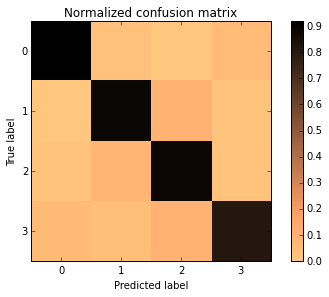

In [29]:
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix', cmap=plt.cm.copper_r)